In [1]:
# Video Link -> https://www.youtube.com/watch?v=VMj-3S1tku0&t=4s

import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

In [4]:
xs = np.arange(-5, 5, .25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

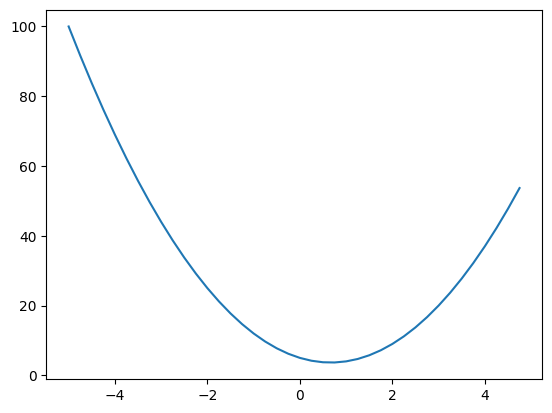

In [6]:
plt.plot(xs, ys)

In [7]:
# Notes
# We will need to now take the derivative of the f(x) we defined. The problem is taking the derivative of an 
# expression is quite complex and while involve a lot of variables. Instead what we will try to do here is 
# we will try to go over the definition of a derivative and satisfy that.

# Definition of a derivative.
# L = lim      f(x + h) - f(x)
#      h -> 0  ---------------
#                    h

# Explanation: Basically we are checking here if we take a tiny step forward quantified by h (represented by h approaching almost 0 in the limit),
# how will the expression
# react? so based on this definition. Let's try the logic below.

In [8]:
h = 0.00000001 # a very small step forward.
x = 3.0

(f(x+h) - f(x)) / h

14.00000009255109

In [9]:
h = 0.00000001 # a very small step forward.
x = -3.0

(f(x+h) - f(x)) / h

-22.00000039920269

In [10]:
h = 0.000001 # a very small step forward.
x = 2/3

(f(x+h) - f(x)) / h

2.999378523327323e-06

In [11]:
a = 2.0
b = -3.0
c = 10.0

d = a*b + c

print(d)

4.0


In [12]:
# Let's compute the derivative of the expression above.
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

# Let's do d1 w.r.t a
d1 = a*b + c

a += h

d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [13]:
# The answer of slope is -3 because we are doing d1/da -> differentiating
# d1 w.r.t a. Meaning we can say since we are differentiating w.r.t a,
# a is gone, c is a constant so not gonna consider it so b is all that remains
# and this is obvious from the slope that b is -3 and the slope is -3
# We can apply the same logic for a too.

In [14]:
# Let's compute the derivative of the expression above.
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

# Let's do d1 w.r.t a
d1 = a*b + c

b += h

d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [96]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._backward = lambda: None
        self.grad = 0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward
        
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
            
        out._backward = _backward
        
        return out
    
    def __rmul__(self, other):
        return self * other
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float."
        
        out = Value(self.data**other, (self,), f'**{other}')
        
        def _backward():
            self.grad += (other * (self.data**(other -1))) * out.grad
            
        out._backward = _backward
        
        return out
    
    def __truediv__(self, other):
        return self * (other**-1)
    
    def tanh(self):
        x = self.data
        
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1- t**2) * out.grad
            
        out._backward = _backward
        
        return out
    
    def __sub__(self, other):
        return self + (-other)
    
    def exp(self):
        x = self.data

        out = Value(math.exp(x), (self, ), 'exp')
        
        def _backward():
            self.grad += out.data * out.grad
            
        out._backward = _backward
        
        return out
    
    def __radd__(self, other):
        return self + other
    
    def backward(self):
        # Build a topological sort
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)

        self.grad = 1
        
        for node in reversed(topo):
            node._backward()

In [16]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

e = a*b; e.label = 'e'
d = e + c; d.label = 'd'

f = Value(-2.0, label='f')

L = d * f; L.label = 'L'

L

Value(data=-8.0)

In [17]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [18]:
d._op

'+'

In [19]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    
    build(root)
    
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    
    nodes, edges = trace(root)
    
    for n in nodes:
        uid = str(id(n))
        
        dot.node(name=uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            
            dot.edge(uid + n._op, uid)
            
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

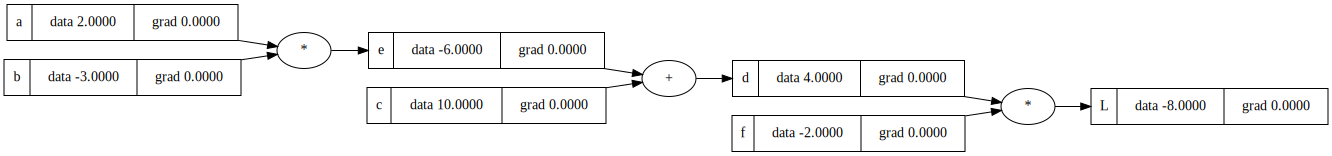

In [20]:
draw_dot(L)

In [21]:
# Because the gradient (or derivative) of L w.r.t to itself is 1.
# For proof, change the value of L2 to L.data + h and you'll get back
# 0.99999999

L.grad = 1

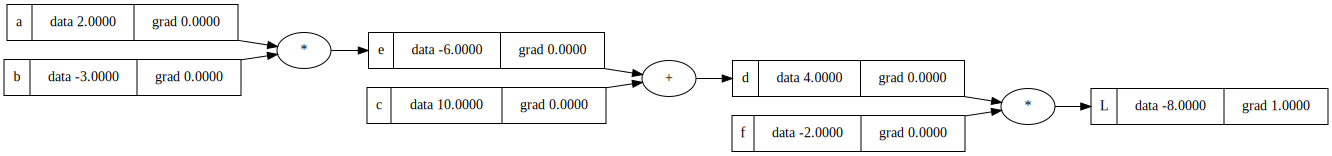

In [22]:
draw_dot(L)

In [23]:
def lol():
    h = 0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'

    f = Value(-2.0, label='f')

    L = d * f; L.label = 'L'

    L1 = L.data
    
    a = Value(2.0 + h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')

    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'

    f = Value(-2.0, label='f')

    L = d * f; L.label = 'L'

    L2 = L.data
    
    print ((L2 - L1) / h)
    
lol()

6.000000000021544


In [24]:
# Let's find out what is dL/dd. Or the derivative L w.r.t d.

# We know 
# L = d * f

# dL/dd in our case is going to be just f. Let's derive it.
# By formula 

# Definition of a derivative.
# L = lim      f(x + h) - f(x)
#      h -> 0  ---------------
#                    h

# dL/dd

# ((d+h * f) - d*f) / h
# Expand the above expression
# (d*f + h*f - d*f) / h
# d*f gets cancelled
# h*f / h
# h gets cancelled
# We are left with f.

# Given the logic above, we can say
d.grad = f.data
f.grad = d.data

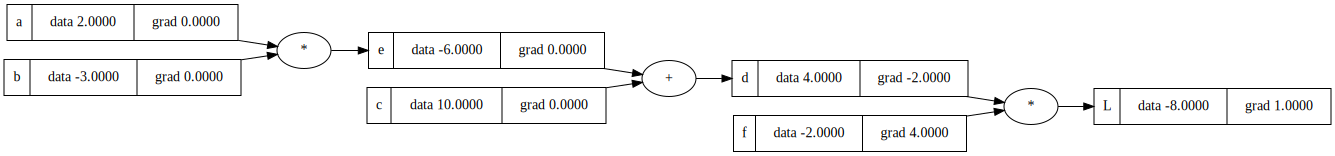

In [25]:
draw_dot(L)

In [26]:
# Let's do dL/dc
# Issue is, there is d between c and L so we gotta apply the chain rule.
# This chain rule will apply as dL/dc = dL/dd * dd/dc

# Let's do dd/dc first.
# We know
# d = c + e 
# from the diagram above.
# We know derivative is f(x+h) - f(x) / h
# (c + h + e) - (c + e) / h
# Opening the brackets
# c + h + e - c - e / h
# c and c gets cancelled, e and e gets cancelled and we end up with
# h / h or 1

# By symmetry dd/de will be 1 as well.
# so by using chain rule we can do the following
# dL/dc = dL/dd * dd/dc
# dL/dd = d.grad
# dd/dc = 1
c.grad = 1 * d.grad
e.grad = 1 * d.grad

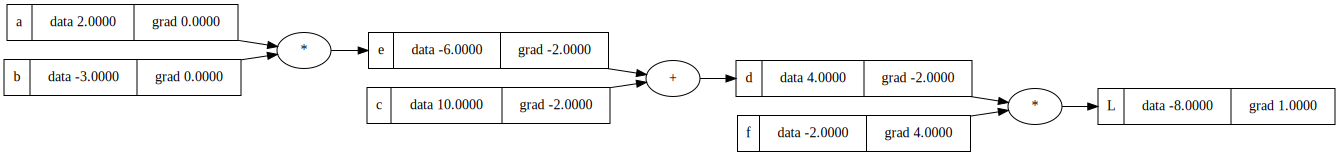

In [27]:
draw_dot(L)

In [28]:
# We gotta apply the chain rule for dL/da as well.
# dL/da = dL/dd * dd/de * de/da
# We can replace this dL/dd * dd/de by dL/de
# so dL/da = dL/de * de/da
# We know dL/de is -2
a.grad = (e.grad * b.data)
b.grad = (e.grad * a.data)

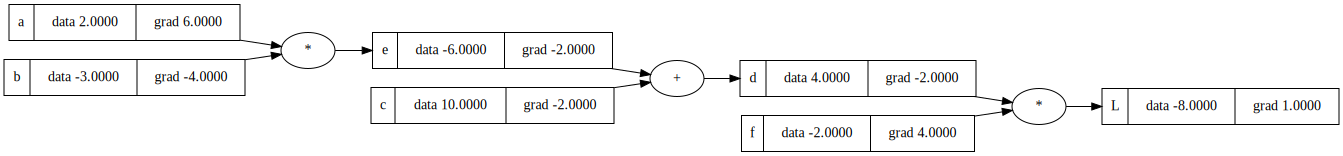

In [29]:
draw_dot(L)

In [30]:
# Let's try the L to go up.
# we'll nudge all the leaf nodes a litle bit by multiplying 0.001 the learning rate
# by the gradient a.k.a the weight.

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

# Let's rewrite the forward pass.
e = a*b
d = e+c

L = d*f

print(L.data)

-7.286496


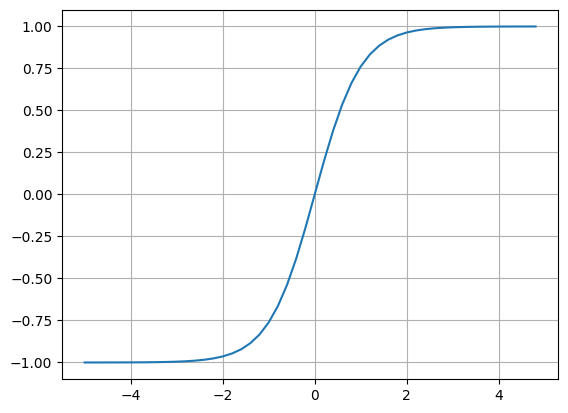

In [31]:
# Let's do one more example of manual backpropagation but a bit more complex
# this time.

# Let's explore the squashing function or activation function first.
# We have multiple options ReLU, tanh, sigmoid.
# but here we will use tanh.

plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))
plt.grid()

In [47]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'

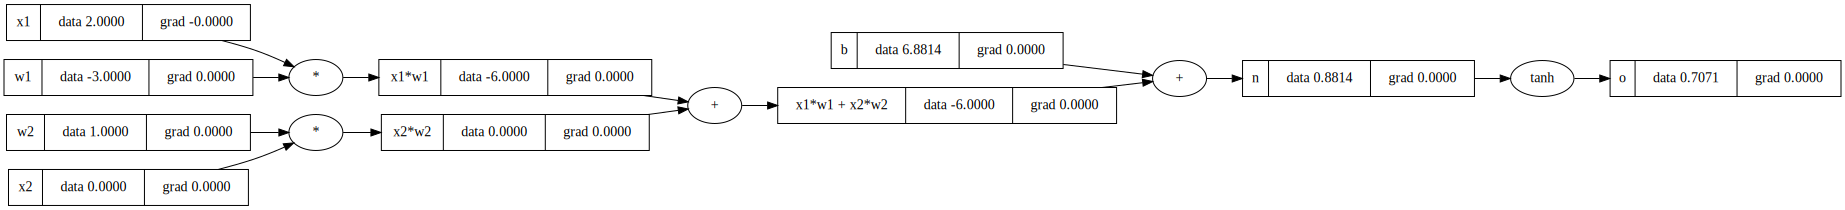

In [48]:
draw_dot(o)

In [34]:
# We know do/do = 1
o.grad = 1

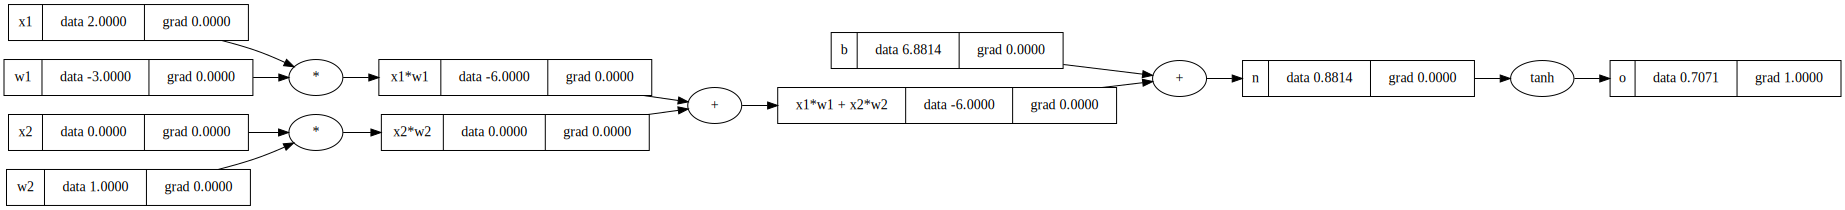

In [35]:
draw_dot(o)

In [36]:
# if o = tanh(n)
# what is do/dn?
# According to wikipedia, the derivative of tanh(x) is as follows
# 1-tanh^2(x) or sec^2(x) or 1 / cos^2(x)
# We can say
# do/dn = 1-tanh(n)**2
# since we know tanh(n) we can substite above with
# do/dn = 1 - o**2
n.grad = 1 - o.data**2

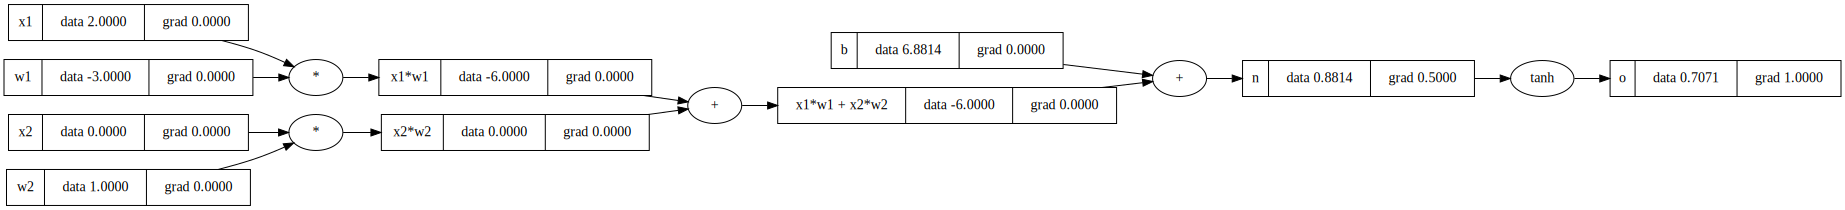

In [37]:
draw_dot(o)

In [38]:
# So tapping into our logic, we are going to auto insert the grads.

x1w1x2w2.grad = 1 * n.grad
b.grad = 1 * n.grad

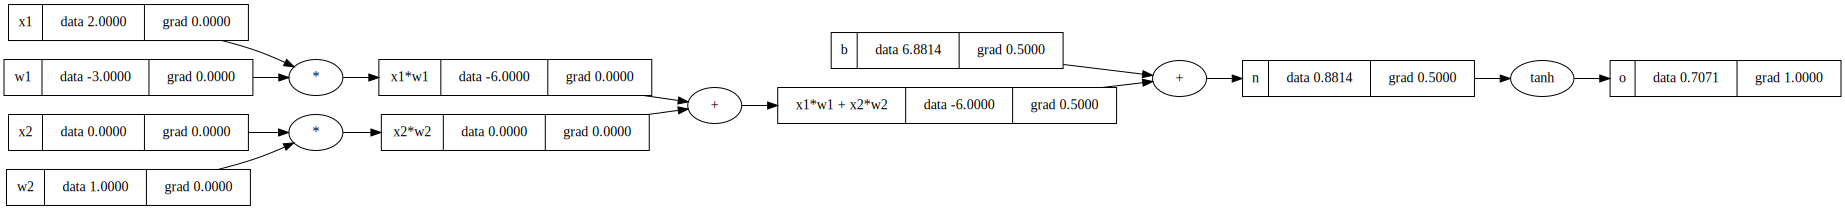

In [39]:
draw_dot(o)

In [40]:
x1w1.grad = 1 * x1w1x2w2.grad
x2w2.grad = 1 * x1w1x2w2.grad

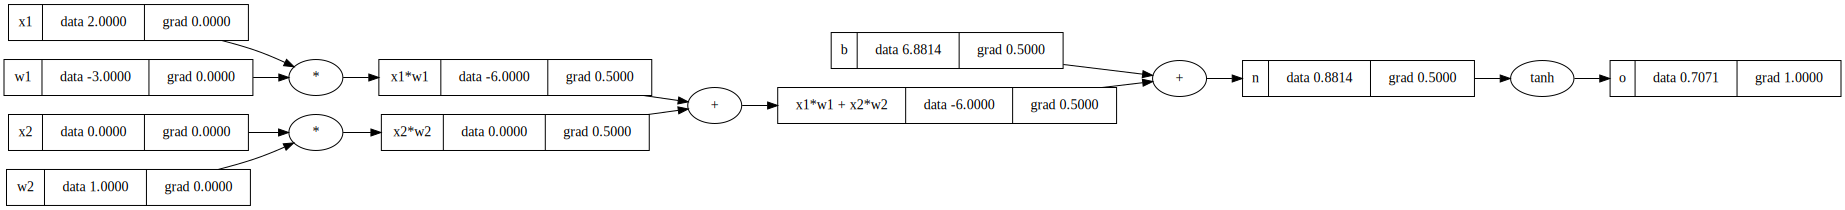

In [41]:
draw_dot(o)

In [42]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

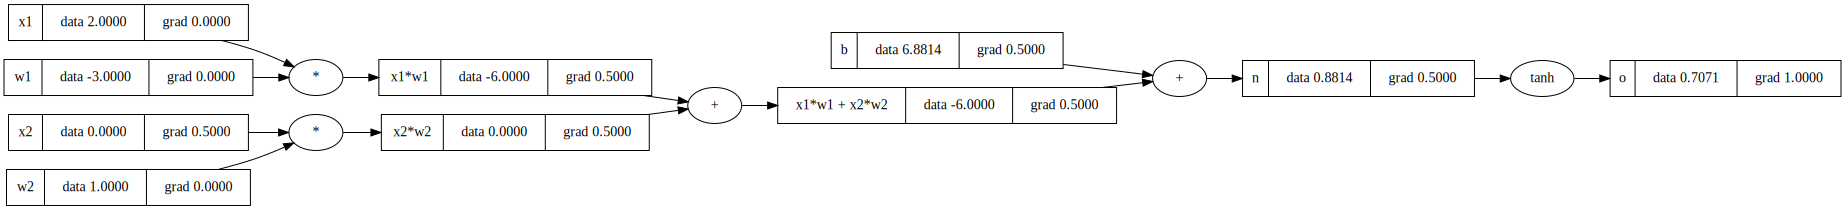

In [43]:
draw_dot(o)

In [44]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

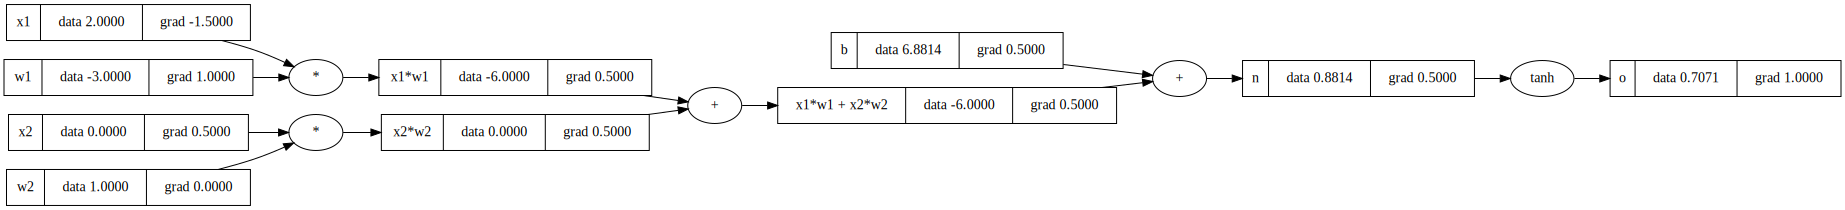

In [45]:
draw_dot(o)

In [69]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'

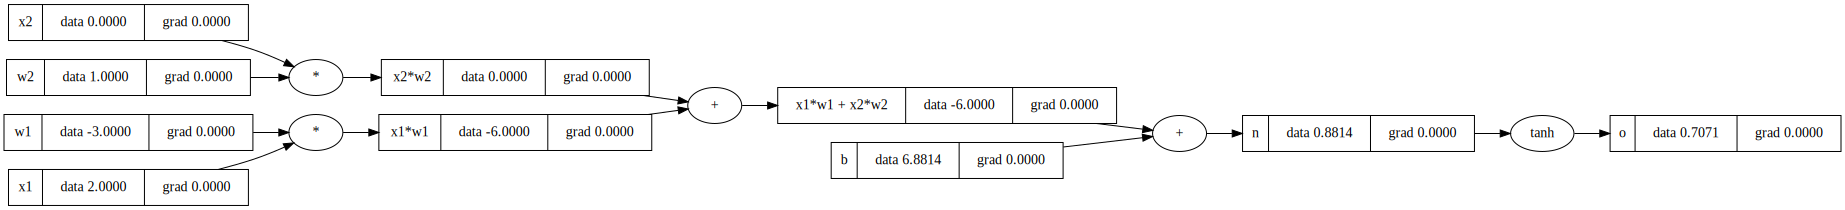

In [70]:
draw_dot(o)

In [62]:
# As a base case, we need to set it to 1.0 because initially it will be set to 0.
o.grad = 1.0

In [71]:
o.backward()

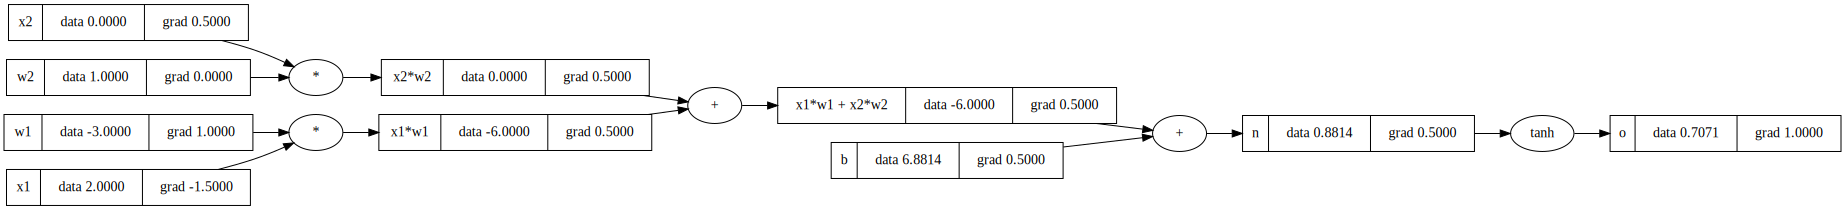

In [72]:
draw_dot(o)

[Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

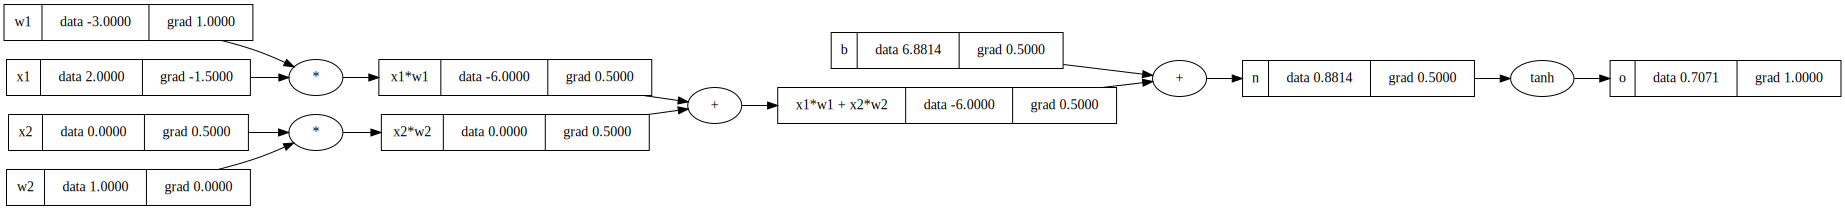

In [67]:
for node in reversed(topo):
    node._backward()
    
draw_dot(o)

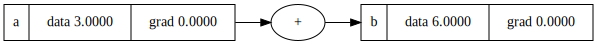

In [77]:
# Bug

a = Value(3.0, label='a')
b = a + a; b.label = 'b'

draw_dot(b)

In [78]:
b.backward()

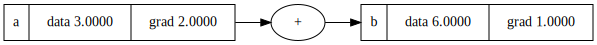

In [79]:
draw_dot(b)

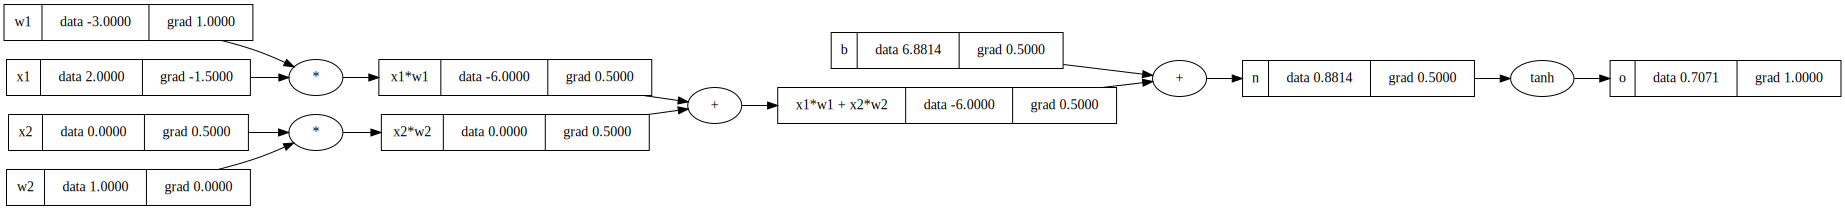

In [83]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'

o.backward()

draw_dot(o)

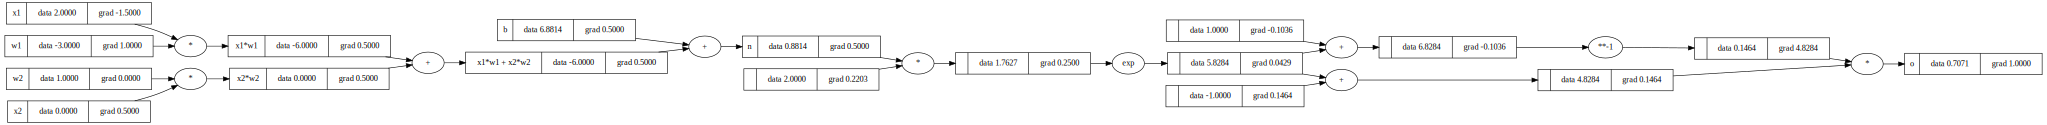

In [86]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b; n.label = 'n'
# ---------------
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ---------------
o.label = 'o'

o.backward()

draw_dot(o)

In [87]:
import torch

In [88]:
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True
n = x1*w1 + x2*w2 + b

o = torch.tanh(n)

print(o.data.item())

o.backward()

print('------')

print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
------
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [89]:
torch.Tensor()

tensor([])

In [130]:
import random

class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))
        
    def __call__(self, x):
        # w * x + b
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        
        out = act.tanh()
        
        return out
    
    def parameters(self):
        return self.w + [self.b]
    
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
        
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
    
class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
            
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]


In [156]:
x = [2.0, 3.0, -1]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.13567212365322154)

In [157]:
n.parameters()

[Value(data=0.33061235610670914),
 Value(data=0.13299977113161554),
 Value(data=-0.8850725295694382),
 Value(data=0.14515185482229298),
 Value(data=0.1905400127699035),
 Value(data=0.8512040134678078),
 Value(data=0.4095024066622832),
 Value(data=0.155690686404917),
 Value(data=-0.9743449194930698),
 Value(data=-0.7746480833243554),
 Value(data=-0.5288518124324832),
 Value(data=0.9764506997439082),
 Value(data=0.6194831689187279),
 Value(data=-0.8386183888332346),
 Value(data=-0.4407792122352745),
 Value(data=-0.594185704898623),
 Value(data=-0.11359822199967295),
 Value(data=-0.2008333691185149),
 Value(data=-0.9482901332814886),
 Value(data=-0.8257274158347652),
 Value(data=0.9138766639797398),
 Value(data=0.6553428037044999),
 Value(data=-0.03389891256479527),
 Value(data=0.7518846967535879),
 Value(data=-0.9529590109275254),
 Value(data=-0.7243623431767501),
 Value(data=-0.8893455353127211),
 Value(data=-0.42937539375009925),
 Value(data=-0.8684618764168606),
 Value(data=-0.1067334

In [158]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]

In [1]:
# ygt => y ground truth
# We are going with mean squared loss function.

for k in range(200):
    # Forward pass 
    ypred = [n(x) for x in xs]

    # Calculate mean squared error.
    loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
    
    # Backward pass
    for p in n.parameters():
        p.grad = 0.0

    loss.backward()
    
    # update
    for p in n.parameters():
        p.data += -0.05 * p.grad
    
    print(k, loss.data)

NameError: name 'xs' is not defined

In [160]:
ypred

[Value(data=0.9646171074454564),
 Value(data=-0.967611969284657),
 Value(data=-0.9692653772386339),
 Value(data=0.96972283809763)]